In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import pymc3 as pm
import theano.tensor as tt
import arviz as az
from sklearn.decomposition import PCA

In [2]:
import sys; sys.path.append('..')
import ouijapymc

In [3]:
example_gex = pd.read_csv('example.csv')
response_type = np.array([col.split('_')[0] for col in example_gex.columns])

In [4]:
ouija = ouijapymc.Ouija(example_gex, response_type)

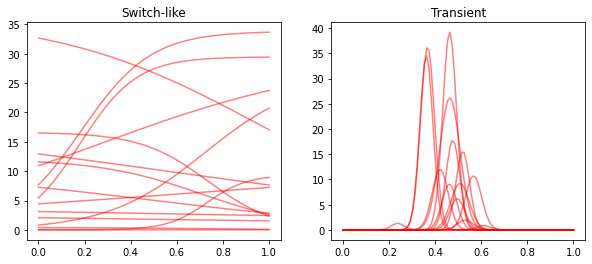

In [5]:
_ = ouija.plot_prior_gene_curves()

In [121]:
# ouija.train(chains=1, draws=100, tune=100)
# ouija.save('trace/')

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta, phi, time_transient, length_transient, peak_transient, time_switch, strength_switch, peak_switch, peak_hyper, t]


Sampling 1 chain for 100 tune and 100 draw iterations (100 + 100 draws total) took 168 seconds.
The acceptance probability does not match the target. It is 0.9056295794430693, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [6]:
ouija.load('trace/')

/home/mochar/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/home/mochar/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


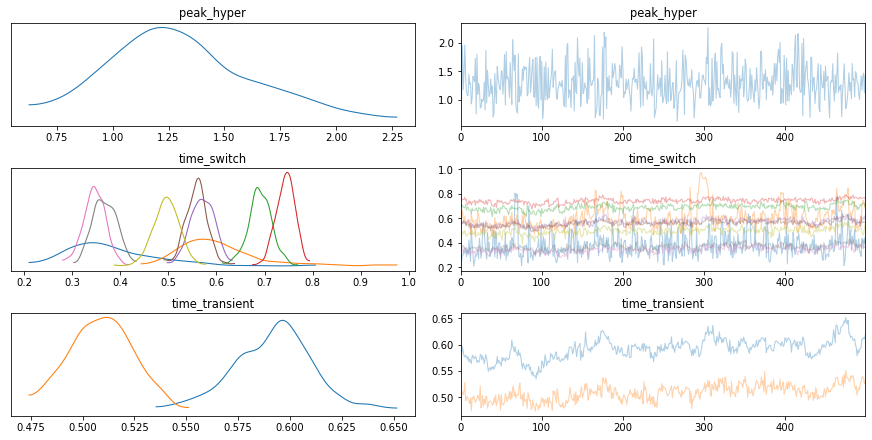

In [10]:
az.plot_trace(ouija.trace, var_names=['peak_hyper', 'time_switch', 'time_transient']);

/home/mochar/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:496: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  if len(interval_width) == 0:
/home/mochar/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:496: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  if len(interval_width) == 0:
/home/mochar/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:496: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  if len(interval_width) == 0:
/home/mochar/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:496: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) fo

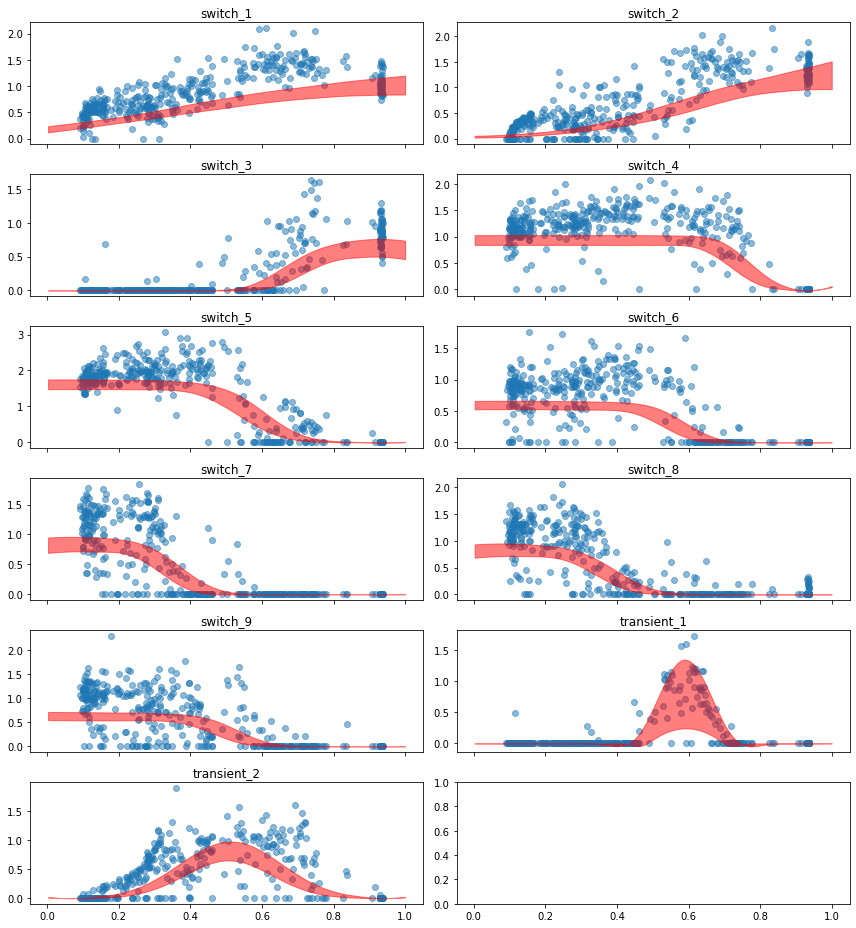

In [11]:
_ = ouija.plot_gene_curves()

/home/mochar/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:496: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  if len(interval_width) == 0:


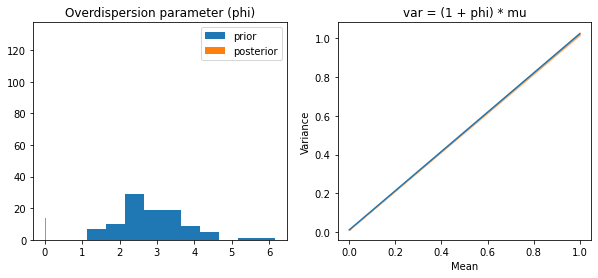

In [12]:
_ = ouija.plot_overdispersion()

/home/mochar/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:496: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  if len(interval_width) == 0:


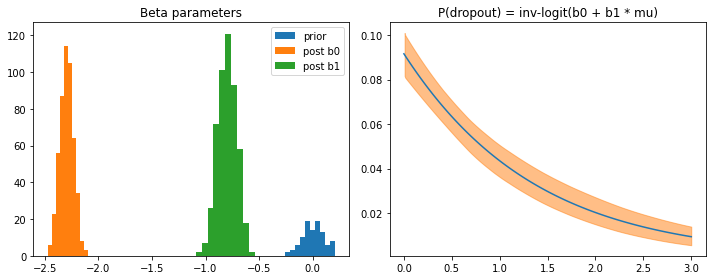

In [13]:
_ = ouija.plot_dropout()

In [7]:
pca = PCA(2)
pcs = pca.fit_transform(ouija.Y)

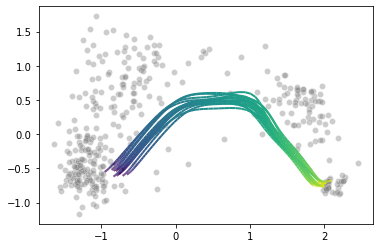

In [8]:
ouija.plot_curve_embedding(pca, pcs)

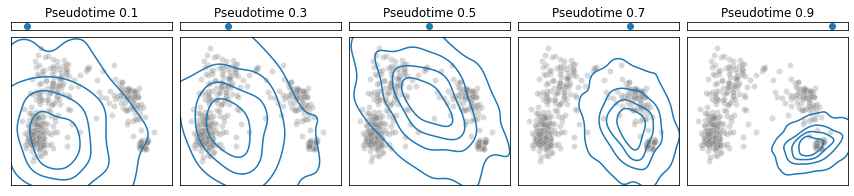

In [8]:
ouija.plot_predictive(pca, pcs)